## Tile Provider Maps

Bokeh plots can also consume XYZ tile services which use the Web Mercator projection. The module [bokeh.tile_providers](https://docs.bokeh.org/en/latest/docs/reference/tile_providers.html#bokeh-tile-providers) contains several pre-configured tile sources with appropriate attribution which can be added to a plot using the [add_tile()](https://docs.bokeh.org/en/latest/docs/reference/models/plots.html#bokeh.models.plots.Plot.add_tile) method.

### Supplier: [CartoDB](https://carto.com/blog/getting-to-know-positron-and-dark-matter/)

There doesn’t seem to be a day that goes by anymore without us seeing some far out data visualization using CartoDB

They will give your viewers geospatial context while they zoom around your maps. The maps come in two color themes so that you can make your data shine in any scenario. And we give you the ability to use either map with or without labels, helping you customize any map.

These maps are built using data from OpenStreetMap, which means that they are up-to-date with the latest data coming from mapping efforts around the world. It means that if you see pieces missing, you have the ability to update or edit those features directly from your browser.


Web Mercator, Google Web Mercator, Spherical Mercator, WGS 84 Web Mercator or WGS 84/Pseudo-Mercator is a variant of the Mercator projection and is the de facto standard for Web mapping applications. It rose to prominence when Google Maps adopted it in 2005.

In [1]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.tile_providers import get_provider
from bokeh.tile_providers import Vendors
from bokeh.io import reset_output

reset_output()
output_notebook()

tile_provider = get_provider(Vendors.CARTODBPOSITRON_RETINA)

# range bounds supplied in web mercator coordinates
p = figure(x_range=(-20000000, 6000000), y_range=(-1000000, 7000000),
           x_axis_type="mercator", y_axis_type="mercator")
p.add_tile(tile_provider)

show(p)

ImportError: cannot import name 'get_provider'

Notice also that passing x_axis_type="mercator" and y_axis_type="mercator" to figure generate axes with latitude and longitude labels, instead of raw Web Mercator coordinates.

Lmao to use Google Maps you need an [API Key](https://datantify.com/lab/nearplace/blog/how-to-generate-google-map-api-key-for-free/)...

If you're like me and are wary of google in general. Check these [out](https://datantify.com/lab/nearplace/blog/google-maps-api-alternatives/).

You can use google maps and the instructions can be found [here](https://docs.bokeh.org/en/latest/docs/user_guide/geo.html)

In [2]:
for i in enumerate(Vendors):
    print(i)

NameError: name 'Vendors' is not defined

In [ ]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.tile_providers import get_provider
from bokeh.tile_providers import Vendors

output_notebook()

tile_provider = get_provider(Vendors.STAMEN_TERRAIN_RETINA)

# range bounds supplied in web mercator coordinates
p = figure(x_range=(-20000000, 6000000), y_range=(-1000000, 7000000),
           x_axis_type="mercator", y_axis_type="mercator")
p.add_tile(tile_provider)

show(p)

### GeoJSON Data

GeoJSON is a popular open standard for representing geographical features with JSON. It describes points, lines, and polygons (called Patches in Bokeh) as a collection of features. Each feature can also have a set of properties.

Bokeh’s GeoJSONDataSource can be used almost seamlessly in place of Bokeh’s ColumnDataSource

In [ ]:
import json

from bokeh.io import output_file, show
from bokeh.models import GeoJSONDataSource
from bokeh.plotting import figure
from bokeh.sampledata.sample_geojson import geojson

output_notebook()

data = json.loads(geojson)


data = json.loads(geojson)
for i in range(len(data['features'])):
    data['features'][i]['properties']['Color'] = ['blue', 'red'][i%2]

geo_source = GeoJSONDataSource(geojson=json.dumps(data))

TOOLTIPS = [
    ('Organisation', '@OrganisationName')
]

p = figure(background_fill_color="lightgrey", tooltips=TOOLTIPS)
p.circle(x='x', y='y', size=15, color='Color', alpha=0.7, source=geo_source)

show(p)


## Walkthrough: Mapping Basics with Bokeh and GeoPandas in Python 

From data and files to a static map to an interactive map

Geopandas is an open source package that helps users work with geospatial data. GeoPandas has a number of dependencies. One of those dependencies is shapely, and it is on this library that Geopandas relies for performing geometric operations. In our case the shape of each state will be encoded as a polygon or multipolygon via the shapely package. Then used through Geopandas to understandd the geospatial data

Goal 1: Create a mpa of the contiguous US that shows the state population. Within each state, show where lead was found in 2018. 

In order to create a map, you will need a shapefile (.shp). In this case, download a shapefile from the US Census Bureau.

For a variety of shapefiles look [here](https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html)

In [12]:
import pandas as pd
import numpy as np
import re 
import geopandas as gpd
import pandas as pd
import json

In [13]:
contiguous_usa = gpd.read_file('map_data/cb_2018_us_state_500k/cb_2018_us_state_500k.shp')
urban_areas_usa = gpd.read_file('map_data/cb_2018_us_ua10_500k/cb_2018_us_ua10_500k.shp')

# Remove Alaska and Hawaii
contiguous_usa= contiguous_usa.loc[~contiguous_usa['NAME'].isin(['Alaska', 'Hawaii'])]

Each state has a corresponding geometry which can be visualized as above.

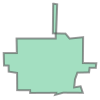

In [3]:
urban_areas_usa.iloc[1]['geometry']

In [14]:
urban_areas_usa = urban_areas_usa.rename(columns={"NAME10": "city_name"})
urban_areas_usa.head()

,UACE10,AFFGEOID10,GEOID10,city_name,LSAD10,UATYP10,ALAND10,AWATER10,geometry
0,88732,400C100US88732,88732,"Tucson, AZ",75,U,915276150,2078695,"MULTIPOLYGON (((-110.81345 32.11910, -110.7987..."
1,01819,400C100US01819,01819,"Alturas, CA",76,C,4933312,16517,"MULTIPOLYGON (((-120.54610 41.51264, -120.5459..."
2,22366,400C100US22366,22366,"Davenport, IA--IL",75,U,357345121,21444164,"MULTIPOLYGON (((-90.36678 41.53636, -90.36462 ..."
3,93322,400C100US93322,93322,"Waynesboro, PA--MD",76,C,45455957,88872,"MULTIPOLYGON (((-77.50746 39.71577, -77.50605 ..."
4,02548,400C100US02548,02548,"Angola, IN",76,C,23646957,3913803,"MULTIPOLYGON (((-85.01157 41.59300, -85.00589 ..."


In [15]:
def border_states_redacted(name):
    if ('--' in name):
        entry_split= name.split(',')
        city_name=entry_split[0]
        states = entry_split[1].split('--')
        for i in states:
            print(city_name,i)
            
def border_states(name):
    if ('--' in name):
        entry_split= name.split(',')
        city_name= entry_split[0].split('--')[0]
        state = entry_split[1].split('--')[0]
        return ','.join([city_name,state])
    else: 
        return name
    
urban_areas_usa['city_name'] = urban_areas_usa['city_name'].apply(border_states)
urban_areas_usa.loc[urban_areas_usa['city_name'].loc[urban_areas_usa['city_name']=='Nashville-Davidson, TN'].index.values[0],'city_name'] = 'Nashville, TN' 
urban_areas_usa.loc[urban_areas_usa['city_name'].loc[urban_areas_usa['city_name']=='Lexington-Fayette, KY'].index.values[0],'city_name'] = 'Lexington, KY' 

### Let's Load the Budget Dataset

In [16]:
filepath= 'data/demographics/budgets.csv'
budgets_df = pd.read_csv(filepath)

def convert_name(name):
    nm_list = name.split(':')[::-1]
    return ', '.join(nm_list).strip()
    
budgets_df['city_merge_name'] = budgets_df['city_name'].apply(convert_name)
budgets_df['state'] = budgets_df['city_name'].apply(lambda name:name.split(":")[0])
budgets_df[budgets_df.year==2017].head()

,year,city_name,id_city,city_population,cpi,rev_total_city,rev_general_city,intergovt_rev_city,igr_federal_city,igr_state_city,...,cash_other_other,county_name,id_county,county_population,relationship_city_school,enrollment,districts_in_city,consolidated_govt,city_merge_name,state
40,2017,AK: Anchorage,22002001.0,297216,1.0,5694.71,4819.11,2087.49,130.60,1956.89,...,2011.64,NaN,NaN,NaN,4.0,NaN,NaN,1.0,"Anchorage, AK",AK
81,2017,AK: Fairbanks,22006001.0,32015,1.0,1875.06,1875.06,654.10,4.09,650.01,...,6009.89,Fairbanks North Star,21006002.0,100683.0,5.0,NaN,NaN,0.0,"Fairbanks, AK",AK
122,2017,AL: Birmingham,12037003.0,211436,1.0,3655.60,2424.82,213.32,45.73,167.59,...,2879.90,Jefferson,11037037.0,660326.0,1.0,24693.0,1.0,0.0,"Birmingham, AL",AL
163,2017,AL: Mobile,12049004.0,191885,1.0,2408.76,2083.78,90.65,43.90,46.75,...,1497.00,Mobile,11049049.0,415499.0,2.0,25673.0,1.0,0.0,"Mobile, AL",AL
204,2017,AL: Montgomery,12051001.0,200360,1.0,1889.79,1339.40,141.95,24.14,117.81,...,1797.75,Montgomery,11051051.0,227072.0,2.0,28347.0,1.0,0.0,"Montgomery, AL",AL


### Let's Merge The Datasets

In [17]:
merged_df = urban_areas_usa.merge(budgets_df[budgets_df.year==2017],left_on='city_name',right_on = 'city_merge_name',how='inner').rename(columns={"city_name_x": "city_name"})
merged_df.city_name[:5]

0        Tucson, AZ
1    Charleston, SC
2     Worcester, MA
3     Las Vegas, NV
4     Fairbanks, AK
Name: city_name, dtype: object

### Let's make sure Nashville is in there

In [8]:
for i in merged_df.city_name.values:
    if('TN' in i):
        print(i)

Nashville, TN
Knoxville, TN
Chattanooga, TN
Memphis, TN


Now that we have merged the data and limited it to the contiguous USA, we can convert the data to a format that is conducive to mapping

In [13]:
import json
from bokeh.io import show, output_notebook,output_file
from bokeh.resources import INLINE
from bokeh.models import (CDSView, ColorBar, ColumnDataSource,
                          CustomJS, CustomJSFilter, 
                          GeoJSONDataSource, HoverTool,
                          LinearColorMapper, Slider)
from bokeh.layouts import column, row, widgetbox
from bokeh.palettes import brewer
from bokeh.plotting import figure

# Input GeoJSON source that contains features for plotting
geosource = GeoJSONDataSource(geojson = merged_df.to_json())
geosource2 = GeoJSONDataSource(geojson = contiguous_usa.to_json())

output_file('plot.html')
p = figure(title = 'Urban Areas and Budgets 2017', y_range=(20, 50),x_range=(-126, -66),
           plot_height = 600 ,
           plot_width = 950, 
           toolbar_location = 'below',
           tools = 'pan, wheel_zoom, box_zoom, reset')
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
# Add patch renderer to figure.

states = p.patches('xs','ys', source = geosource2,
                   fill_color = None,
                   line_color = 'gray', 
                   line_width = 0.15, 
                   fill_alpha = 1)

areas = p.patches('xs','ys', source = geosource)
#                   fill_color = None,
#                   line_color = 'gray', 
#                   line_width = 0.25, 
#                   fill_alpha = 1)

p.add_tools(HoverTool(renderers = [areas],
                      tooltips = [('City','@city_name'),
                                  ('Revenue','@rev_total'),
                                  ('Education Services','@education_services'),
                                  ('Education','@education'),
                                  ('Police','@police'),
                                  ('Social Services','@social_services'),
                                  ('Public Safety','@public_safety')
                                 ]))
show(p)

In [101]:
def clean_text(string,replace='-'):
    regex = '[^A-Za-z0-9 ]+'
    return re.sub(regex, replace, string)

def clean_cities(city):
    res = city.split(',')
    if(len(res)>1):
        ret = clean_text(res[0].strip()).split('-')[0].strip()+', '+res[1].strip().split('-')[0]
    else:
        ret = res[0]
    return ret
    

In [102]:
fbi_data = pd.read_csv('data/crime_data/FBI_Data_Clean.csv')
fbi_data['city']=fbi_data['city'].apply(clean_cities)

In [ ]:
def border_states_redacted(name):
    if ('--' in name):
        entry_split= name.split(',')
        city_name=entry_split[0]
        states = entry_split[1].split('--')
        for i in states:
            print(city_name,i)
            
def border_states(name):
    if ('--' in name):
        entry_split= name.split(',')
        city_name= entry_split[0].split('--')[0]
        state = entry_split[1].split('--')[0]
        return ','.join([city_name,state])
    else: 
        return name

In [18]:
merged_df.shape

(120, 673)

In [31]:
merged_df.columns

Index(['UACE10', 'AFFGEOID10', 'GEOID10', 'city_name', 'LSAD10', 'UATYP10',
       'ALAND10', 'AWATER10', 'geometry', 'year',
       ...
       'cash_other_other', 'county_name', 'id_county', 'county_population',
       'relationship_city_school', 'enrollment', 'districts_in_city',
       'consolidated_govt', 'city_merge_name', 'state'],
      dtype='object', length=673)

In [112]:
from matplotlib import pyplot as plt

# increase the size and quality of any plots we produce
import matplotlib as mpl

mpl.rcParams["figure.dpi"] = 300

In [117]:
combined_df = merged_df.merge(fbi_data[fbi_data['year']==2017],left_on='city_name',right_on = 'city',how='inner')#.rename(columns={"city_name_x": "city_name"})

Text(0.5, 0, 'Police Budget Spending')

Text(0, 0.5, 'Rate per 100,000 Violent Crime Rate')

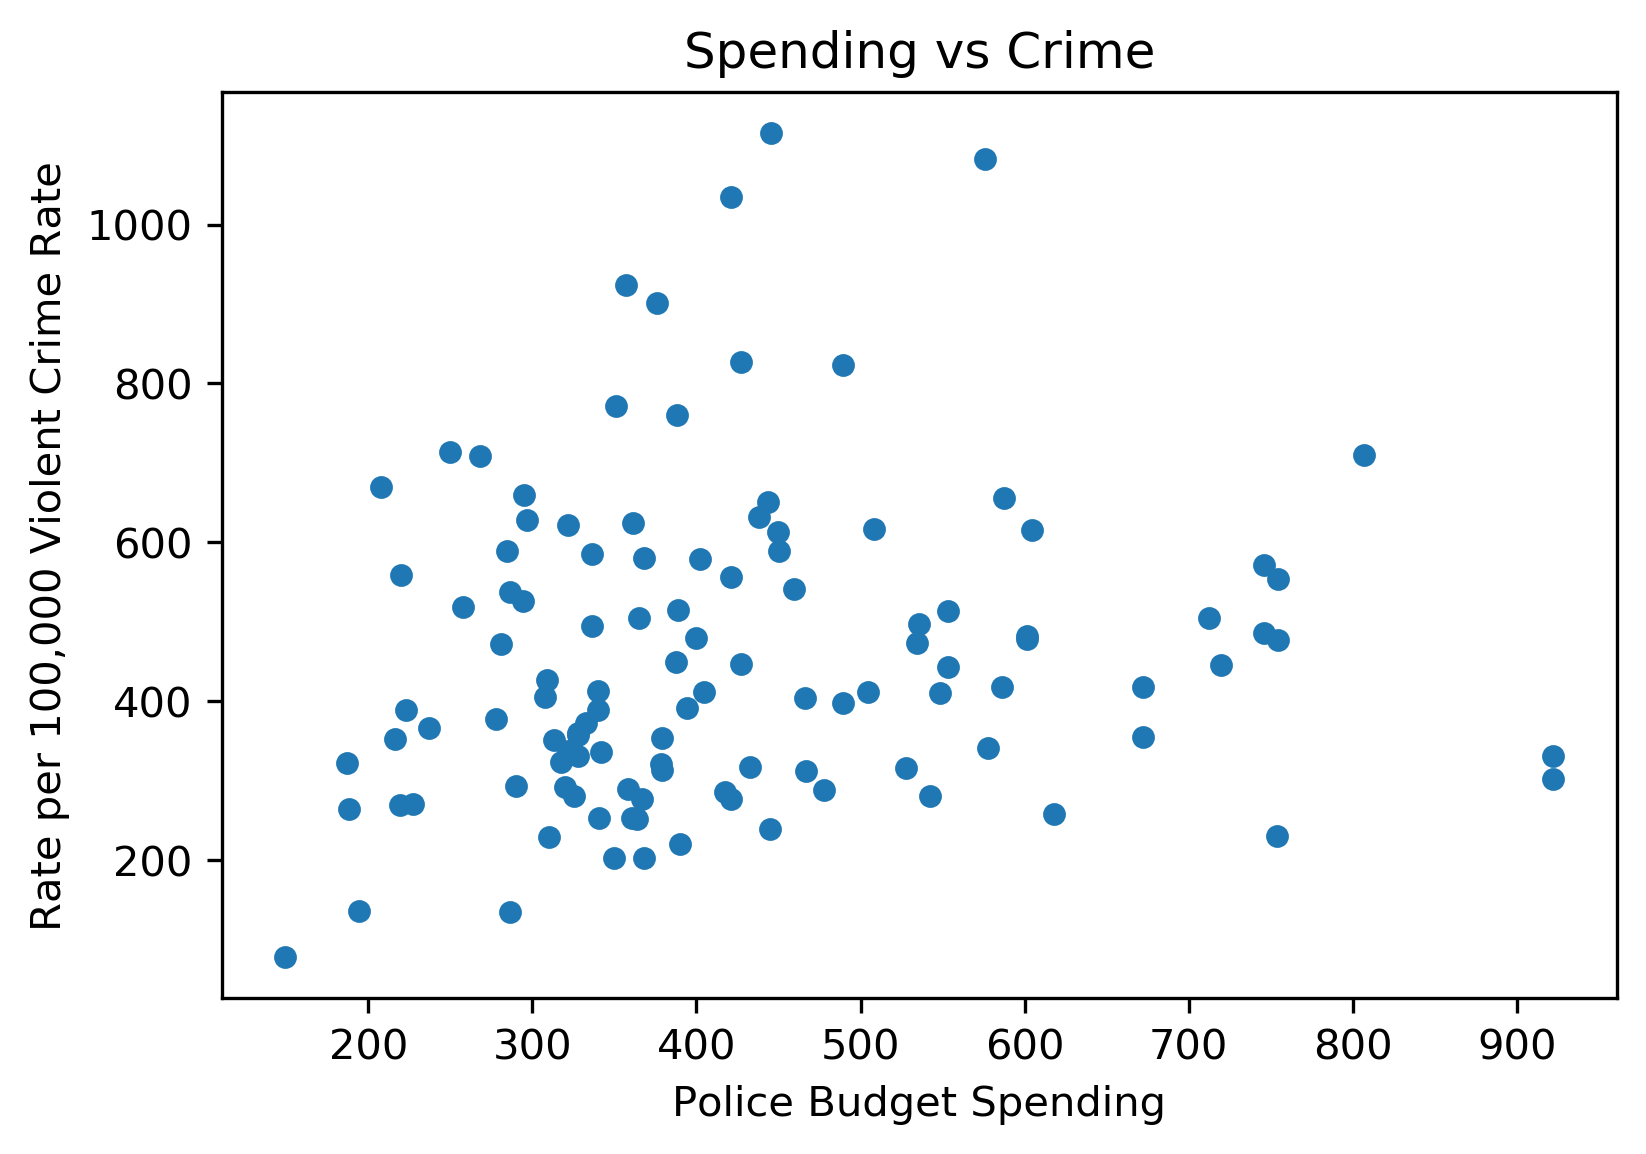

In [118]:
ax = combined_df[['city_name','police','violent_crime']].dropna().plot.scatter(x="police", y="violent_crime")
ax.set_xlabel("Police Budget Spending")
ax.set_ylabel("Rate per 100,000 Violent Crime Rate")
_ = ax.set_title("Spending vs Crime")